In [28]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [29]:
X, y = make_blobs(n_samples=50,centers=2, random_state=0, cluster_std=0.8)
X.shape

(50, 2)

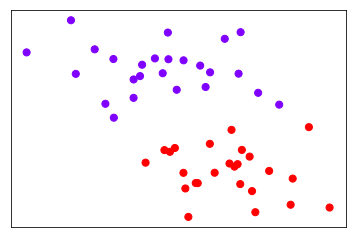

In [30]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

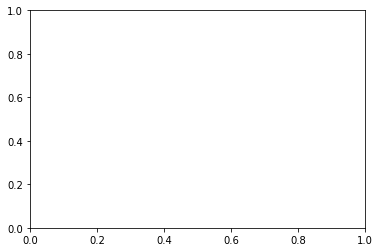

In [31]:
ax = plt.gca() #  获取当前的子图， 如果不存在的话，就创建新的子图

画出决策边界， 制作网格， 

In [32]:
# 获取 平面上  两条坐标轴 的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ylim

(0.0, 1.0)

In [33]:
# 在最大值和最小值席间形成30个规律的数据
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
axisy, axisx = np.meshgrid(axisy, axisx)

In [34]:
axisx

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276],
       [0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
        0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
        0.06896552, 0.06896552, 0.06896552, 0.

In [35]:
axisx.shape

(30, 30)

In [36]:
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [37]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
# 其中 ravel()，vstack 能够将多个数据结构一致的一维数据按行 堆叠起来
#  xy,就是已经形成的网络，他是遍布在整个画布上的密集的点
xy

array([[0.        , 0.        ],
       [0.        , 0.03448276],
       [0.        , 0.06896552],
       ...,
       [1.        , 0.93103448],
       [1.        , 0.96551724],
       [1.        , 1.        ]])

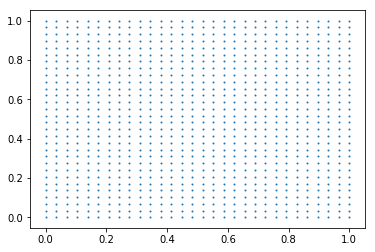

In [38]:
plt.scatter(xy[:,0],xy[:,1],s=1, cmap="rainbow")

有了网格后，我们需要计算网格所代表的“平面上所有的点”到我们的决策边界的距离。所以我们需要我们的模型和
决策边界

## 建模，进行画图

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(0.0, 1.0)

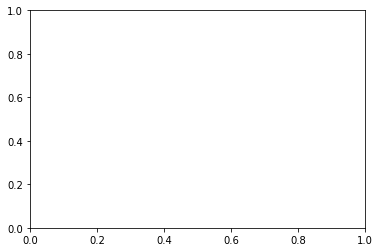

In [40]:

#  建模， 通过 fit 计算找到对应的决策边界
clf = SVC(kernel="linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
# 重要接口 decision_function 返回每个输入样本所对应的决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
#画决策边界和平行于决策边界的超平面
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap="rainbow")
ax = plt.gca()
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
            ,alpha=0.5
            ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

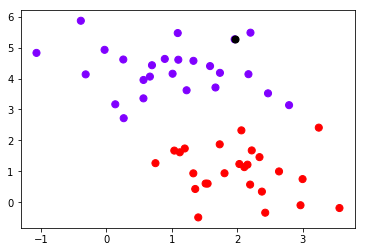

In [41]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

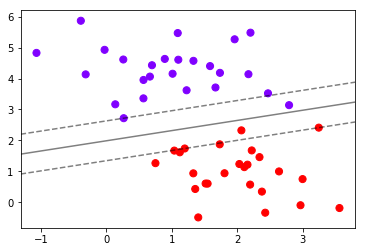

In [42]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

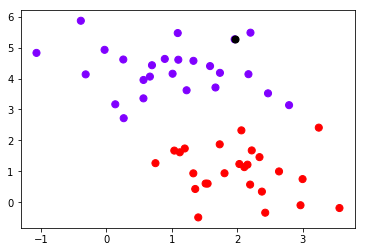

In [43]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

In [45]:
#  黑色点到决策边界的距离
clf.decision_function(X[10].reshape(1,2))

array([-4.09610275])

TypeError: Shape of x does not match that of z: found (30, 30) instead of (50, 2).

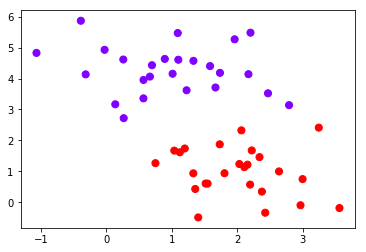

In [52]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,X
            ,colors="k"
            ,levels=[-4.09610275]
            ,alpha=0.5
            ,linestyles=["--"])

In [53]:
clf.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [54]:
clf.support_vectors_

array([[0.26604148, 2.71915015],
       [2.79207378, 3.14029479],
       [1.19866542, 1.74122504],
       [2.06366754, 2.32636006],
       [3.24586928, 2.414375  ]])

In [55]:
clf.n_support_

array([2, 3])

##  推广到非线性情况

In [56]:
from sklearn.datasets import make_circles
X,y = make_circles(200, factor=0.1, noise=.2)
X.shape

(200, 2)

In [57]:
y.shape

(200,)

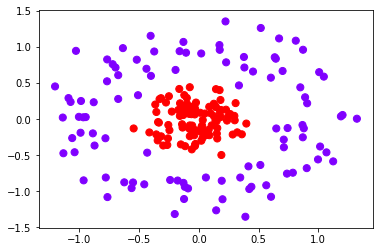

In [58]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="rainbow")
plt.show()

试试看 我们已经定义的函数 来划分这个数据的决策边界

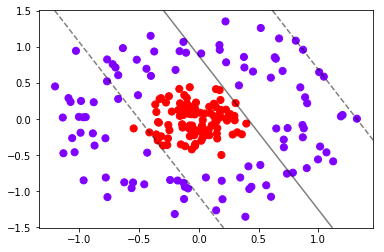

In [59]:
clf = SVC(kernel="linear").fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

为非线性数据增加维度并绘制3D图像

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


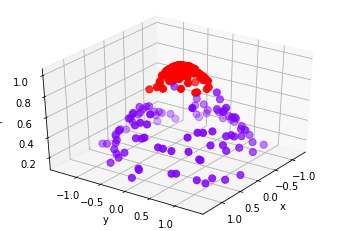

In [62]:
# 定义一个由  X 计算出来的新维度 r
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

from mpl_toolkits import mplot3d


# 定义一个绘制三维图像的函数
#elev  表示上下旋转的角度
# azim 表示平行旋转的角度
def plot_3D(elev=35, azim=35,X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


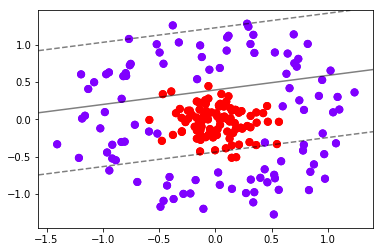

interactive(children=(Dropdown(description='elev', index=2, options=(0, 15, 30, 45, 60, 90, 120, 150, 180), va…

In [66]:
## 可以互动的代码
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(200, factor=0.1, noise=.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r),max(r),0.2)


from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
        ax = plt.subplot(projection="3d")
        ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
        ax.view_init(elev=elev,azim=azim)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("r")
        plt.show()
from ipywidgets import interact,fixed

interact(plot_3D,elev=[0,15,30,45,60,90,120,150,180],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


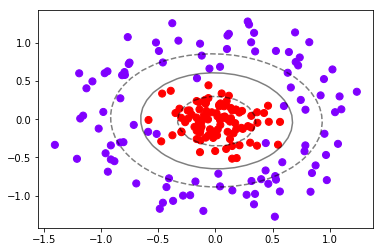

In [68]:
#  画出 高斯核 下的  分类结果
clf = SVC(kernel="rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [69]:
clf.n_support_

array([28, 28])

In [71]:
len(clf.support_vectors_)

56